In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from generate_results import initialize

In [13]:
# Utility functions
def load_csv(file_path: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading CSV: {e}")

def get_years(num_time_steps: int) -> np.ndarray:
    """Returns vectors of years with 5-year time steps, starting at year 0.

    Args:
        num_time_steps (int): Total number of time steps to return year vector for.

    Returns:
        np.ndarray: An array of years starting from year 0, stepping by 5 years.
    """
    start_year = 0
    end_year = start_year + 5 * num_time_steps - 5
    
    years = np.arange(start_year, end_year + 1, 5)
    
    return years

In [3]:
env2016, agent2016 = initialize("2016")


Restoring policy network from C:\Users\herma\OneDrive\Skrivebord\DNN-for-ACE\logs/2016/checkpoints\ckpt-2703


In [20]:
# Loading data and defining ranges
csv_path2016 = 'plots/results/ACE_DICE2016/trajectories/csv/trajectory_data.csv'
df2016 = load_csv(csv_path2016)
df2016.head()

num_time_steps = 80
year_labels = get_years(num_time_steps)

# Plotting state variables

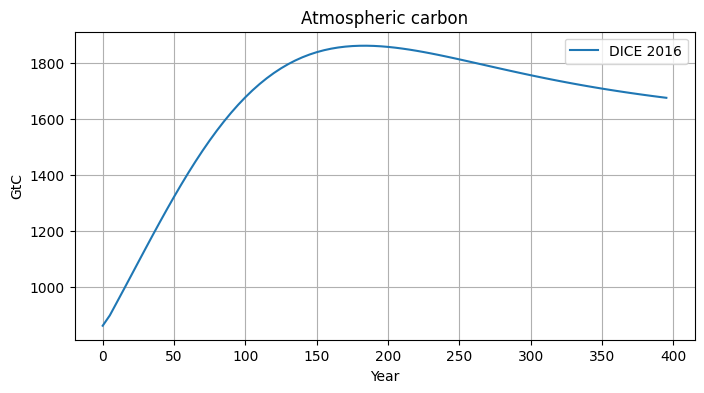

In [23]:
if len(df2016['M_1_t']) >= num_time_steps:
    plt.figure(figsize=(8, 4))
    plt.plot(year_labels, df2016['M_1_t'][:num_time_steps], label='DICE 2016')
    plt.title('Atmospheric carbon')
    plt.xlabel('Year')
    plt.ylabel('GtC')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The data does not have enough entries for the requested number of time steps.")

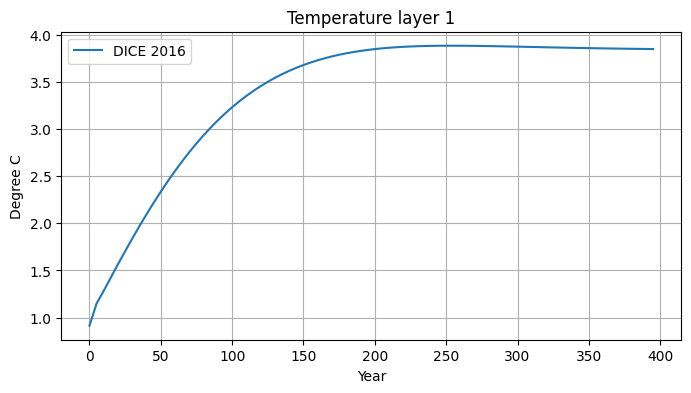

In [24]:
if len(df2016['tau_1_t']) >= num_time_steps:
    
    normal_temperatures = np.log(df2016['tau_1_t'][:num_time_steps]) / env2016.equations_of_motion.xi_1.numpy()

    plt.figure(figsize=(8, 4))
    plt.plot(year_labels, normal_temperatures, label='DICE 2016')
    plt.title('Temperature layer 1')
    plt.xlabel('Year')
    plt.ylabel('Degree C')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The data does not have enough entries for the requested number of time steps.")

# Plotting action variables

In [26]:
# Calculate SCC and optimal abatement rate